In [2]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy

In [13]:
'''

Functions used

'''

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def biGauss(x, pos, wid, r, amp):
    mask = x < pos

    y_all = ([])
    for i in range(0, len(mask)):

        if mask[i] == True:
            m = 1
            nm = 0
        else:
            m = 0
            nm = 1
        if r != 0:
            y1 = gaussian(x[i],pos,r*wid/(r+1),amp)*m
            y2 = gaussian(x[i],pos,wid/(r+1),amp)*nm
            y = y1 + y2
        else:
            y = gaussian(x[i],pos,wid, amp)*nm

        y_all = np.append(y_all, y)
    return y_all

def double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    b1 = biGauss(x, pos1, wid1, r1, amp1)
    b2 = biGauss(x, pos2, wid2, r2, amp2)
    b = np.append(b1, b2)
    return b1+b2

def log_likelihood_biGauss(theta, n, x):
    pos, wid, r, amp = theta
    model = biGauss(x, pos, wid, r, amp)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    print('*****************One Peak***************')
    print(theta)
    return np.sum(L)

def log_likelihood_doublePeak(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    print('*****************Double Peak***************')
    print(theta)
    return np.sum(L)

def likelihood_ratio_doublePeak(x, n, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

def likelihood_ratio_biGauss(x, n, pos, wid, r, amp):
    model = biGauss(x, pos, wid, r, amp)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

In [14]:
'''

Loading the geometry

'''

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

loaded geometry


('FILE NUMBER - ', 96)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
LOG LIKELIHOOD
----------BOUNDS-----------
((-15.895478874444962, 12.104521125555038), (0, 110), (0, 1010), (0, 1000000.0))
*****************One Peak***************
[3.27757397e-10 5.00000000e+01 5.00000000e+00 7.17000000e+02]
*****************One Peak***************
[3.27757397e-10 5.00000000e+01 5.00000000e+00 7.17000000e+02]
*****************One Peak***************
[  1.  50.   5. 717.]
*****************One Peak***************
[  2.618034  50.         5.       717.      ]
*****************One Peak***************
[  1.  50.   5. 717.]
*****************One Peak***************
[  1.61803398  50.           5.         717.        ]
*****************One Peak***************
[  1.99999998  50.           5.         717.        ]
*****************One Peak***************
[  2.23606797  50.           5.         717

*****************One Peak***************
[  5.17585792  55.17585792  10.17585792 722.15023486]
*****************One Peak***************
[  5.17585792  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  7.76378688  57.76378688  12.76378688 724.76378688]
*****************One Peak***************
[  5.17585792  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  6.17585792  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  7.79389192  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  6.17585792  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  6.7938919   55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  7.17585791  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  7.41192589  55.17585792  10.17585792 722.17585792]
*****************One Peak***************
[  7.5578

*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 728.96974982]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.35171583]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.58778381]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.73368185]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.8238518 ]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.87957989]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.91402175]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.93964481]
*****************One Peak***************
[ 15.52757377  65.52757377  20.52757377 732.52757377]
*****************One Peak***************
[ 12.93964481  62.93964481  17.93964481 729.93964481]
*****************One Peak***************
[ 13.9396

*****************One Peak***************
[ 20.70343169  70.70343169  25.67780863 735.11550273]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 735.11550273]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 735.11550273]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 736.11550273]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 737.73353673]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 736.11550273]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 736.73353671]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 737.11550272]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 737.3515707 ]
*****************One Peak***************
[ 20.70343169  70.70343169  25.70343169 737.49746873]
*****************One Peak***************
[ 20.7034

[ 28.46721858  78.46721858  31.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.49732362 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  31.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  32.49732359 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  32.8792896  742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.11535758 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.26125562 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.35142557 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.40715366 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.44159552 742.87928962]
*****************One Peak***************
[ 28.46721858  78.46721858  33.46721858 742.879289

[ 36.23100546  86.2611105   38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  84.6430765   38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  85.26111047  38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  85.64307648  38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  85.87914447  38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  86.0250425   38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  86.11521245  38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  86.17094055  38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  86.2053824   38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  86.23100546  38.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  86.23100546  38.6430765  750.643076

*****************One Peak***************
[ 41.40686339  91.20090043  43.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.29107038  43.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.34679847  43.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.38124033  43.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.40686338  43.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.40686338  43.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.40686338  44.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.40686338  46.43696842 755.81893442]
*****************One Peak***************
[ 41.40686339  91.40686338  44.81893442 755.81893442]
*****************One Peak***************
[ 41.40686339  91.40686338  45.4369684  755.81893442]
*****************One Peak***************
[ 41.4068

*****************One Peak***************
[ 49.05485726  96.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.11058535  96.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.14502721  96.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  96.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  96.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  97.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  99.20075531  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  97.58272131  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  98.20075528  51.58272131 763.58272131]
*****************One Peak***************
[ 49.17065027  98.58272129  51.58272131 763.58272131]
*****************One Peak***************
[ 49.1706

*****************One Peak***************
[ 55.96454217 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.34650818 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.58257616 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.7284742  104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.81864414 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.87437224 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.9088141  104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.93443715 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.93443715 104.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.93443715 105.34650819  59.34650819 771.34650819]
*****************One Peak***************
[ 56.9344

*****************One Peak***************
[ 64.69822404 114.69822404  69.69822404 781.69822404]
*****************One Peak***************
[ 62.11029508 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 63.11029508 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 64.72832908 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 63.11029508 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 63.72832905 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 64.11029506 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 64.34636304 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 64.49226108 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 64.58243103 112.11029508  67.11029508 779.11029508]
*****************One Peak***************
[ 64.6381

*****************One Peak***************
[ 69.87408196 119.87408196  74.87408196 786.75828895]
*****************One Peak***************
[ 69.87408196 119.87408196  74.87408196 786.81401705]
*****************One Peak***************
[ 69.87408196 119.87408196  74.87408196 786.8484589 ]
*****************One Peak***************
[ 69.87408196 119.87408196  74.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092 122.46201092  77.46201092 789.46201092]
*****************One Peak***************
[ 69.87408196 119.87408196  74.87408196 786.87408196]
*****************One Peak***************
[ 70.87408196 119.87408196  74.87408196 786.87408196]
*****************One Peak***************
[ 72.49211596 119.87408196  74.87408196 786.87408196]
*****************One Peak***************
[ 70.87408196 119.87408196  74.87408196 786.87408196]
*****************One Peak***************
[ 71.49211594 119.87408196  74.87408196 786.87408196]
*****************One Peak***************
[ 71.8740

*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 793.66797386]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.04993987]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.28600785]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.43190589]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.52207584]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.57780393]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.61224579]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781 130.22579781  85.22579781 797.22579781]
*****************One Peak***************
[ 77.63786885 127.63786885  82.63786885 794.63786885]
*****************One Peak***************
[ 78.6378

*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 800.81372677]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 802.43176077]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 800.81372677]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 801.43176074]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 801.81372675]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 802.04979473]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 802.19569277]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 802.28586272]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 802.34159082]
*****************One Peak***************
[ 85.40165573 135.40165573  90.40165573 802.37603267]
*****************One Peak***************
[ 85.4016

*****************One Peak***************
[ 93.16544262 143.16544262  98.04964961 807.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.1053777  807.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.13981956 807.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 807.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 807.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 808.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 810.19554765]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 808.57751365]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 809.19554763]
*****************One Peak***************
[ 93.16544262 143.16544262  98.16544262 809.57751364]
*****************One Peak***************
[ 93.1654

[100.9292295  150.9292295  105.95933454 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  104.34130054 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  104.95933451 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.34130052 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.5773685  815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.72326654 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.81343649 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.86916458 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.90360644 815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.9292295  815.34130054]
*****************One Peak***************
[100.9292295  150.9292295  105.9292295  815.341300

*****************One Peak***************
[108.69301639 158.63295147 111.10508742 823.10508742]
*****************One Peak***************
[108.69301639 158.66739333 111.10508742 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 111.10508742 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 111.10508742 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 112.10508742 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 113.72312142 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 112.10508742 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 112.7231214  823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 113.10508741 823.10508742]
*****************One Peak***************
[108.69301639 158.69301638 113.34115539 823.10508742]
*****************One Peak***************
[108.6930

*****************One Peak***************
[116.45680327 165.48690828 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 165.86887429 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.10494227 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.25084031 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.34101026 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.39673835 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.43118021 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.45680327 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.45680327 118.86887431 830.86887431]
*****************One Peak***************
[116.45680327 166.45680327 119.86887431 830.86887431]
*****************One Peak***************
[116.4568

*****************One Peak***************
[124.22059015 171.63266119 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 171.63266119 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 172.63266119 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 174.25069519 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 172.63266119 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 173.25069517 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 173.63266118 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 173.86872916 126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 174.0146272  126.63266119 838.63266119]
*****************One Peak***************
[124.22059015 174.10479714 126.63266119 838.63266119]
*****************One Peak***************
[124.2205

*****************One Peak***************
[130.39644808 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[132.01448208 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[130.39644808 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.01448205 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.39644806 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.63251604 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.77841408 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.86858403 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.92431212 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.95875398 179.39644808 134.39644808 846.39644808]
*****************One Peak***************
[131.9843

*****************One Peak***************
[137.16023496 187.16023496 142.16023496 852.572306  ]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 853.19033998]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 853.57230598]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 853.80837397]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 853.954272  ]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 854.04444195]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 854.10017005]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 854.1346119 ]
*****************One Peak***************
[137.16023496 187.16023496 142.16023496 854.16023496]
*****************One Peak***************
[139.74816392 189.74816392 144.74816392 856.74816392]
*****************One Peak***************
[137.1602

*****************One Peak***************
[144.92402185 194.92402185 149.89839879 859.33609289]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 859.33609289]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 859.33609289]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 860.33609289]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 861.95412689]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 860.33609289]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 860.95412686]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 861.33609287]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 861.57216085]
*****************One Peak***************
[144.92402185 194.92402185 149.92402185 861.71805889]
*****************One Peak***************
[144.9240

*****************One Peak***************
[152.68780873 202.68780873 157.33594773 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.48184577 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.57201572 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.62774382 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.66218567 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.68780873 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.68780873 867.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.68780873 868.09987977]
*****************One Peak***************
[152.68780873 202.68780873 157.68780873 869.71791377]
*****************One Peak***************
[152.68780873 202.68780873 157.68780873 868.09987977]
*****************One Peak***************
[152.6878

*****************One Peak***************
[160.45159562 210.45159562 163.86366665 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 165.48170065 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 163.86366665 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 164.48170063 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 164.86366664 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 165.09973462 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 165.24563266 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 165.33580261 874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 165.3915307  874.86366665]
*****************One Peak***************
[160.45159562 210.45159562 165.42597256 874.86366665]
*****************One Peak***************
[160.4515

*****************One Peak***************
[168.2153825  215.62745354 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  216.62745354 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  218.24548754 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  216.62745354 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  217.24548751 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  217.62745352 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  217.8635215  170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  218.00941954 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  218.09958949 170.62745354 882.62745354]
*****************One Peak***************
[168.2153825  218.15531758 170.62745354 882.62745354]
*****************One Peak***************
[168.2153

*****************One Peak***************
[175.86337638 223.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.91910447 223.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.95354633 223.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 223.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 223.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 224.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 226.00927442 178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 224.39124042 178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 225.0092744  178.39124042 890.39124042]
*****************One Peak***************
[175.97916939 225.39124041 178.39124042 890.39124042]
*****************One Peak***************
[175.9791

*****************One Peak***************
[182.15502731 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[182.77306128 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.15502729 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.39109527 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.53699331 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.62716326 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.68289135 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.71733321 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.74295627 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.74295627 231.15502731 186.15502731 898.15502731]
*****************One Peak***************
[183.7429

*****************One Peak***************
[189.91881419 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.53684819 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[189.91881419 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[190.53684817 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[190.91881418 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.15488216 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.3007802  238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.39095015 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.44667824 238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.4811201  238.91881419 193.91881419 905.91881419]
*****************One Peak***************
[191.5067

*****************One Peak***************
[196.68260108 246.68260108 201.47663812 911.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.56680807 911.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.62253616 911.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.65697802 911.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.68260108 911.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.68260108 911.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.68260108 912.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.68260108 913.71270612]
*****************One Peak***************
[196.68260108 246.68260108 201.68260108 912.09467212]
*****************One Peak***************
[196.68260108 246.68260108 201.68260108 912.71270609]
*****************One Peak***************
[196.6826

*****************One Peak***************
[204.44638796 254.44638796 209.476493   918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 207.858459   918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 208.47649298 918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 208.85845899 918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 209.09452697 918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 209.240425   918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 209.33059495 918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 209.38632305 918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 209.4207649  918.858459  ]
*****************One Peak***************
[204.44638796 254.44638796 209.44638796 918.858459  ]
*****************One Peak***************
[204.4463

*****************One Peak***************
[212.21017485 261.24027986 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 261.62224587 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 261.85831385 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.00421189 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.09438184 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.15010993 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.18455179 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.21017485 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.21017485 214.62224589 926.62224589]
*****************One Peak***************
[212.21017485 262.21017485 215.62224589 926.62224589]
*****************One Peak***************
[212.2101

*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.58792896   2.58792896
  22.58792896   2.         717.        ]
*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.58792896   2.58792896
  22.58792896   3.618034   717.        ]
*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.58792896   2.58792896
  22.58792896   2.         717.        ]
*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.58792896   2.58792896
  22.58792896   2.61803397 717.        ]
*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.58792896   2.58792896
  22.58792896   2.99999998 717.        ]
*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.58792896   2.58792896
  22.58792896   3.23606797 717.        ]
*****************Double Peak***************
[-13.30754991  22.58792896   3.58792896 719.587928

*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.17585792   5.17585792
  25.17585792   3.58792896 719.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.17585792   5.17585792
  25.17585792   3.58792896 719.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.17585792   5.17585792
  25.17585792   4.58792896 719.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.17585792   5.17585792
  25.17585792   6.20596296 719.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.17585792   5.17585792
  25.17585792   4.58792896 719.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.17585792   5.17585792
  25.17585792   5.20596294 719.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.17585792 722.175857

*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.76378688   7.76378688
  27.76378688   7.17585792 722.17585792]
*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.76378688   7.76378688
  27.76378688   7.7938919  722.17585792]
*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.76378688   7.76378688
  27.76378688   8.17585791 722.17585792]
*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.76378688   7.76378688
  27.76378688   8.41192589 722.17585792]
*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.76378688   7.76378688
  27.76378688   8.55782393 722.17585792]
*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.76378688   7.76378688
  27.76378688   8.64799388 722.17585792]
*****************Double Peak***************
[ -8.13169199  27.76378688   8.76378688 724.763786

*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.35171585  10.35171585
  30.35171585  10.38182086 724.76378688]
*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.35171585  10.35171585
  30.35171585  10.76378687 724.76378688]
*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.35171585  10.35171585
  30.35171585  10.99985485 724.76378688]
*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.35171585  10.35171585
  30.35171585  11.14575289 724.76378688]
*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.35171585  10.35171585
  30.35171585  11.23592284 724.76378688]
*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.35171585  10.35171585
  30.35171585  11.29165093 724.76378688]
*****************Double Peak***************
[ -5.54376303  30.35171585  11.35171585 727.351715

*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.93964481  12.93964481
  32.93964481  13.96974985 727.35171585]
*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.93964481  12.93964481
  32.93964481  12.35171585 727.35171585]
*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.93964481  12.93964481
  32.93964481  12.96974982 727.35171585]
*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.93964481  12.93964481
  32.93964481  13.35171583 727.35171585]
*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.93964481  12.93964481
  32.93964481  13.58778381 727.35171585]
*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.93964481  12.93964481
  32.93964481  13.73368185 727.35171585]
*****************Double Peak***************
[ -2.95583407  32.93964481  13.93964481 729.939644

*****************Double Peak***************
[-3.67905105e-01  3.55275738e+01  1.65275738e+01  7.32527574e+02
  1.49396448e+01  3.29396448e+01  1.39396448e+01  7.29939645e+02]
*****************Double Peak***************
[-3.67905105e-01  3.55275738e+01  1.65275738e+01  7.32527574e+02
  1.51757128e+01  3.29396448e+01  1.39396448e+01  7.29939645e+02]
*****************Double Peak***************
[-3.67905105e-01  3.55275738e+01  1.65275738e+01  7.32527574e+02
  1.53216108e+01  3.29396448e+01  1.39396448e+01  7.29939645e+02]
*****************Double Peak***************
[-3.67905105e-01  3.55275738e+01  1.65275738e+01  7.32527574e+02
  1.54117808e+01  3.29396448e+01  1.39396448e+01  7.29939645e+02]
*****************Double Peak***************
[-3.67905105e-01  3.55275738e+01  1.65275738e+01  7.32527574e+02
  1.54675089e+01  3.29396448e+01  1.39396448e+01  7.29939645e+02]
*****************Double Peak***************
[-3.67905105e-01  3.55275738e+01  1.65275738e+01  7.32527574e+02
  1.55019507e+01

*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.11550273  17.52757375
  35.52757377  16.52757377 732.52757377]
*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.11550273  17.76364173
  35.52757377  16.52757377 732.52757377]
*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.11550273  17.90953977
  35.52757377  16.52757377 732.52757377]
*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.11550273  17.99970972
  35.52757377  16.52757377 732.52757377]
*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.11550273  18.05543782
  35.52757377  16.52757377 732.52757377]
*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.11550273  18.08987967
  35.52757377  16.52757377 732.52757377]
*****************Double Peak***************
[  2.22002386  38.11550273  19.11550273 735.115502

*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.70343169  19.73353671
  38.11550273  19.11550273 735.11550273]
*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.70343169  20.11550272
  38.11550273  19.11550273 735.11550273]
*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.70343169  20.3515707
  38.11550273  19.11550273 735.11550273]
*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.70343169  20.49746873
  38.11550273  19.11550273 735.11550273]
*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.70343169  20.58763868
  38.11550273  19.11550273 735.11550273]
*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.70343169  20.64336678
  38.11550273  19.11550273 735.11550273]
*****************Double Peak***************
[  4.80795282  40.70343169  21.70343169 737.7034316

*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065  22.70343168
  40.70343169  21.70343169 737.70343169]
*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065  22.93949966
  40.70343169  21.70343169 737.70343169]
*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065  23.0853977
  40.70343169  21.70343169 737.70343169]
*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065  23.17556764
  40.70343169  21.70343169 737.70343169]
*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065  23.23129574
  40.70343169  21.70343169 737.70343169]
*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065  23.2657376
  40.70343169  21.70343169 737.70343169]
*****************Double Peak***************
[  7.39588178  43.29136065  24.29136065 740.29136065

*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.87928962  24.90939463
  43.29136065  24.29136065 740.29136065]
*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.87928962  25.29136064
  43.29136065  24.29136065 740.29136065]
*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.87928962  25.52742862
  43.29136065  24.29136065 740.29136065]
*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.87928962  25.67332666
  43.29136065  24.29136065 740.29136065]
*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.87928962  25.76349661
  43.29136065  24.29136065 740.29136065]
*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.87928962  25.8192247
  43.29136065  24.29136065 740.29136065]
*****************Double Peak***************
[  9.98381074  45.87928962  26.87928962 742.8792896

*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.46721858  27.8792896
  45.87928962  26.87928962 742.87928962]
*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.46721858  28.11535758
  45.87928962  26.87928962 742.87928962]
*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.46721858  28.26125562
  45.87928962  26.87928962 742.87928962]
*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.46721858  28.35142557
  45.87928962  26.87928962 742.87928962]
*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.46721858  28.40715366
  45.87928962  26.87928962 742.87928962]
*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.46721858  28.44159552
  45.87928962  26.87928962 742.87928962]
*****************Double Peak***************
[ 12.5717397   48.46721858  29.46721858 745.4672185

*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.05514754  30.46721856
  48.46721858  29.46721858 745.46721858]
*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.05514754  30.70328654
  48.46721858  29.46721858 745.46721858]
*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.05514754  30.84918458
  48.46721858  29.46721858 745.46721858]
*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.05514754  30.93935453
  48.46721858  29.46721858 745.46721858]
*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.05514754  30.99508262
  48.46721858  29.46721858 745.46721858]
*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.05514754  31.02952448
  48.46721858  29.46721858 745.46721858]
*****************Double Peak***************
[ 15.15966866  51.05514754  32.05514754 748.055147

*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765   32.05514754
  51.05514754  32.05514754 748.05514754]
*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765   32.67318151
  51.05514754  32.05514754 748.05514754]
*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765   33.05514752
  51.05514754  32.05514754 748.05514754]
*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765   33.2912155
  51.05514754  32.05514754 748.05514754]
*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765   33.43711354
  51.05514754  32.05514754 748.05514754]
*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765   33.52728349
  51.05514754  32.05514754 748.05514754]
*****************Double Peak***************
[ 17.74759763  53.6430765   34.6430765  750.6430765

*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  33.6430765
  53.6430765   34.6430765  750.6430765 ]
*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  34.6430765
  53.6430765   34.6430765  750.6430765 ]
*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  36.2611105
  53.6430765   34.6430765  750.6430765 ]
*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  34.6430765
  53.6430765   34.6430765  750.6430765 ]
*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  35.26111048
  53.6430765   34.6430765  750.6430765 ]
*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  35.64307648
  53.6430765   34.6430765  750.6430765 ]
*****************Double Peak***************
[ 20.33552659  56.23100546  37.23100546 753.23100546  

*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.81893442  36.23100546
  56.23100546  37.23100546 753.23100546]
*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.81893442  36.23100546
  56.23100546  37.23100546 753.23100546]
*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.81893442  37.23100546
  56.23100546  37.23100546 753.23100546]
*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.81893442  38.84903946
  56.23100546  37.23100546 753.23100546]
*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.81893442  37.23100546
  56.23100546  37.23100546 753.23100546]
*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.81893442  37.84903944
  56.23100546  37.23100546 753.23100546]
*****************Double Peak***************
[ 22.92345555  58.81893442  39.81893442 755.818934

*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.40686338  38.81893442
  58.81893442  39.81893442 755.81893442]
*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.40686338  38.81893442
  58.81893442  39.81893442 755.81893442]
*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.40686338  39.81893442
  58.81893442  39.81893442 755.81893442]
*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.40686338  41.43696842
  58.81893442  39.81893442 755.81893442]
*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.40686338  39.81893442
  58.81893442  39.81893442 755.81893442]
*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.40686338  40.4369684
  58.81893442  39.81893442 755.81893442]
*****************Double Peak***************
[ 25.51138451  61.40686338  42.40686338 758.4068633

*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.99479235  41.40686339
  61.40686338  42.40686338 758.40686338]
*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.99479235  41.40686339
  61.40686338  42.40686338 758.40686338]
*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.99479235  42.40686339
  61.40686338  42.40686338 758.40686338]
*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.99479235  44.02489739
  61.40686338  42.40686338 758.40686338]
*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.99479235  42.40686339
  61.40686338  42.40686338 758.40686338]
*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.99479235  43.02489736
  61.40686338  42.40686338 758.40686338]
*****************Double Peak***************
[ 28.09931347  63.99479235  44.99479235 760.994792

*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.55709825  43.99479235
  63.99479235  44.99479235 760.99479235]
*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.58272131  43.99479235
  63.99479235  44.99479235 760.99479235]
*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.58272131  43.99479235
  63.99479235  44.99479235 760.99479235]
*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.58272131  44.99479235
  63.99479235  44.99479235 760.99479235]
*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.58272131  46.61282635
  63.99479235  44.99479235 760.99479235]
*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.58272131  44.99479235
  63.99479235  44.99479235 760.99479235]
*****************Double Peak***************
[ 30.68724243  66.58272131  47.58272131 763.582721

*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.14502721  46.58272131
  66.58272131  47.58272131 763.58272131]
*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.17065027  46.58272131
  66.58272131  47.58272131 763.58272131]
*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.17065027  46.58272131
  66.58272131  47.58272131 763.58272131]
*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.17065027  47.58272131
  66.58272131  47.58272131 763.58272131]
*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.17065027  49.20075531
  66.58272131  47.58272131 763.58272131]
*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.17065027  47.58272131
  66.58272131  47.58272131 763.58272131]
*****************Double Peak***************
[ 33.27517139  69.17065027  50.17065027 766.170650

*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.69851432  49.17065027
  69.17065027  50.17065027 766.17065027]
*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.73295617  49.17065027
  69.17065027  50.17065027 766.17065027]
*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.75857923  49.17065027
  69.17065027  50.17065027 766.17065027]
*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.75857923  49.17065027
  69.17065027  50.17065027 766.17065027]
*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.75857923  50.17065027
  69.17065027  50.17065027 766.17065027]
*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.75857923  51.78868427
  69.17065027  50.17065027 766.17065027]
*****************Double Peak***************
[ 35.86310036  71.75857923  52.75857923 768.758579

*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.23071518  51.75857923
  71.75857923  52.75857923 768.75857923]
*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.28644328  51.75857923
  71.75857923  52.75857923 768.75857923]
*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.32088513  51.75857923
  71.75857923  52.75857923 768.75857923]
*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.34650819  51.75857923
  71.75857923  52.75857923 768.75857923]
*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.34650819  51.75857923
  71.75857923  52.75857923 768.75857923]
*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.34650819  52.75857923
  71.75857923  52.75857923 768.75857923]
*****************Double Peak***************
[ 38.45102932  74.34650819  55.34650819 771.346508

  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.03895828  76.93443715  57.93443715 773.7284742   54.34650819
  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.03895828  76.93443715  57.93443715 773.81864414  54.34650819
  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.03895828  76.93443715  57.93443715 773.87437224  54.34650819
  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.03895828  76.93443715  57.93443715 773.90881409  54.34650819
  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.03895828  76.93443715  57.93443715 773.93443715  54.34650819
  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.03895828  76.93443715  57.93443715 773.93443715  54.34650819
  74.34650819  55.34650819 771.34650819]
*****************Double Peak***************
[ 41.0389

*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.31640316  56.93443715
  76.93443715  57.93443715 773.93443715]
*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.40657311  56.93443715
  76.93443715  57.93443715 773.93443715]
*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.4623012   56.93443715
  76.93443715  57.93443715 773.93443715]
*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.49674306  56.93443715
  76.93443715  57.93443715 773.93443715]
*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.52236612  56.93443715
  76.93443715  57.93443715 773.93443715]
*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.52236612  56.93443715
  76.93443715  57.93443715 773.93443715]
*****************Double Peak***************
[ 43.62688724  79.52236612  60.52236612 776.522366

*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 778.90433212  59.52236612
  79.52236612  60.52236612 776.52236612]
*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 778.99450207  59.52236612
  79.52236612  60.52236612 776.52236612]
*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 779.05023016  59.52236612
  79.52236612  60.52236612 776.52236612]
*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 779.08467202  59.52236612
  79.52236612  60.52236612 776.52236612]
*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 779.11029508  59.52236612
  79.52236612  60.52236612 776.52236612]
*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 779.11029508  59.52236612
  79.52236612  60.52236612 776.52236612]
*****************Double Peak***************
[ 46.2148162   82.11029508  63.11029508 779.110295

*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.11029506  62.11029508
  82.11029508  63.11029508 779.11029508]
*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.34636304  62.11029508
  82.11029508  63.11029508 779.11029508]
*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.49226108  62.11029508
  82.11029508  63.11029508 779.11029508]
*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.58243103  62.11029508
  82.11029508  63.11029508 779.11029508]
*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.63815912  62.11029508
  82.11029508  63.11029508 779.11029508]
*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.67260098  62.11029508
  82.11029508  63.11029508 779.11029508]
*****************Double Peak***************
[ 48.80274516  84.69822404  65.69822404 781.698224

*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   783.31625801  64.69822404
  84.69822404  65.69822404 781.69822404]
*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   783.69822402  64.69822404
  84.69822404  65.69822404 781.69822404]
*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   783.934292    64.69822404
  84.69822404  65.69822404 781.69822404]
*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   784.08019004  64.69822404
  84.69822404  65.69822404 781.69822404]
*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   784.17035999  64.69822404
  84.69822404  65.69822404 781.69822404]
*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   784.22608808  64.69822404
  84.69822404  65.69822404 781.69822404]
*****************Double Peak***************
[ 51.39067413  87.286153    68.286153   784.260529

*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 784.286153    67.286153
  87.286153    68.286153   784.286153  ]
*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 785.286153    67.286153
  87.286153    68.286153   784.286153  ]
*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 786.904187    67.286153
  87.286153    68.286153   784.286153  ]
*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 785.286153    67.286153
  87.286153    68.286153   784.286153  ]
*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 785.90418698  67.286153
  87.286153    68.286153   784.286153  ]
*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 786.28615298  67.286153
  87.286153    68.286153   784.286153  ]
*****************Double Peak***************
[ 53.97860309  89.87408196  70.87408196 786.52222097  67.28615

[ 56.56653205  92.46201092  73.43638786 786.87408196  69.87408196
  89.87408196  70.87408196 786.87408196]
*****************Double Peak***************
[ 56.56653205  92.46201092  73.46201092 786.87408196  69.87408196
  89.87408196  70.87408196 786.87408196]
*****************Double Peak***************
[ 56.56653205  92.46201092  73.46201092 786.87408196  69.87408196
  89.87408196  70.87408196 786.87408196]
*****************Double Peak***************
[ 56.56653205  92.46201092  73.46201092 787.87408196  69.87408196
  89.87408196  70.87408196 786.87408196]
*****************Double Peak***************
[ 56.56653205  92.46201092  73.46201092 789.49211596  69.87408196
  89.87408196  70.87408196 786.87408196]
*****************Double Peak***************
[ 56.56653205  92.46201092  73.46201092 787.87408196  69.87408196
  89.87408196  70.87408196 786.87408196]
*****************Double Peak***************
[ 56.56653205  92.46201092  73.46201092 788.49211594  69.87408196
  89.87408196  70.87408196 7

*****************Double Peak***************
[ 59.15446101  95.04993988  76.02431683 789.46201092  72.46201092
  92.46201092  73.46201092 789.46201092]
*****************Double Peak***************
[ 59.15446101  95.04993988  76.04993988 789.46201092  72.46201092
  92.46201092  73.46201092 789.46201092]
*****************Double Peak***************
[ 59.15446101  95.04993988  76.04993988 789.46201092  72.46201092
  92.46201092  73.46201092 789.46201092]
*****************Double Peak***************
[ 59.15446101  95.04993988  76.04993988 790.46201092  72.46201092
  92.46201092  73.46201092 789.46201092]
*****************Double Peak***************
[ 59.15446101  95.04993988  76.04993988 792.08004492  72.46201092
  92.46201092  73.46201092 789.46201092]
*****************Double Peak***************
[ 59.15446101  95.04993988  76.04993988 790.46201092  72.46201092
  92.46201092  73.46201092 789.46201092]
*****************Double Peak***************
[ 59.15446101  95.04993988  76.04993988 791.080044

*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 792.04993988  75.04993989
  95.04993988  76.04993988 792.04993988]
*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 792.04993988  75.04993989
  95.04993988  76.04993988 792.04993988]
*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 793.04993988  75.04993989
  95.04993988  76.04993988 792.04993988]
*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 794.66797388  75.04993989
  95.04993988  76.04993988 792.04993988]
*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 793.04993988  75.04993989
  95.04993988  76.04993988 792.04993988]
*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 793.66797386  75.04993989
  95.04993988  76.04993988 792.04993988]
*****************Double Peak***************
[ 61.74238997  97.63786885  78.63786885 794.049939

*****************Double Peak***************
[ 64.33031893 100.22579781  81.16573289 794.63786885  77.63786885
  97.63786885  78.63786885 794.63786885]
*****************Double Peak***************
[ 64.33031893 100.22579781  81.20017475 794.63786885  77.63786885
  97.63786885  78.63786885 794.63786885]
*****************Double Peak***************
[ 64.33031893 100.22579781  81.22579781 794.63786885  77.63786885
  97.63786885  78.63786885 794.63786885]
*****************Double Peak***************
[ 64.33031893 100.22579781  81.22579781 794.63786885  77.63786885
  97.63786885  78.63786885 794.63786885]
*****************Double Peak***************
[ 64.33031893 100.22579781  81.22579781 795.63786885  77.63786885
  97.63786885  78.63786885 794.63786885]
*****************Double Peak***************
[ 64.33031893 100.22579781  81.22579781 797.25590285  77.63786885
  97.63786885  78.63786885 794.63786885]
*****************Double Peak***************
[ 64.33031893 100.22579781  81.22579781 795.637868

*****************Double Peak***************
[ 66.9182479  102.81372677  83.75366185 797.22579781  80.22579781
 100.22579781  81.22579781 797.22579781]
*****************Double Peak***************
[ 66.9182479  102.81372677  83.78810371 797.22579781  80.22579781
 100.22579781  81.22579781 797.22579781]
*****************Double Peak***************
[ 66.9182479  102.81372677  83.81372677 797.22579781  80.22579781
 100.22579781  81.22579781 797.22579781]
*****************Double Peak***************
[ 66.9182479  102.81372677  83.81372677 797.22579781  80.22579781
 100.22579781  81.22579781 797.22579781]
*****************Double Peak***************
[ 66.9182479  102.81372677  83.81372677 798.22579781  80.22579781
 100.22579781  81.22579781 797.22579781]
*****************Double Peak***************
[ 66.9182479  102.81372677  83.81372677 799.84383181  80.22579781
 100.22579781  81.22579781 797.22579781]
*****************Double Peak***************
[ 66.9182479  102.81372677  83.81372677 798.225797

[ 69.50617686 105.40165573  86.04979473 799.81372677  82.81372677
 102.81372677  83.81372677 799.81372677]
*****************Double Peak***************
[ 69.50617686 105.40165573  86.19569277 799.81372677  82.81372677
 102.81372677  83.81372677 799.81372677]
*****************Double Peak***************
[ 69.50617686 105.40165573  86.28586272 799.81372677  82.81372677
 102.81372677  83.81372677 799.81372677]
*****************Double Peak***************
[ 69.50617686 105.40165573  86.34159082 799.81372677  82.81372677
 102.81372677  83.81372677 799.81372677]
*****************Double Peak***************
[ 69.50617686 105.40165573  86.37603267 799.81372677  82.81372677
 102.81372677  83.81372677 799.81372677]
*****************Double Peak***************
[ 69.50617686 105.40165573  86.40165573 799.81372677  82.81372677
 102.81372677  83.81372677 799.81372677]
*****************Double Peak***************
[ 69.50617686 105.40165573  86.40165573 799.81372677  82.81372677
 102.81372677  83.81372677 7

*****************Double Peak***************
[ 72.09410582 107.98958469  88.40165572 802.40165573  85.40165573
 105.40165573  86.40165573 802.40165573]
*****************Double Peak***************
[ 72.09410582 107.98958469  88.6377237  802.40165573  85.40165573
 105.40165573  86.40165573 802.40165573]
*****************Double Peak***************
[ 72.09410582 107.98958469  88.78362173 802.40165573  85.40165573
 105.40165573  86.40165573 802.40165573]
*****************Double Peak***************
[ 72.09410582 107.98958469  88.87379168 802.40165573  85.40165573
 105.40165573  86.40165573 802.40165573]
*****************Double Peak***************
[ 72.09410582 107.98958469  88.92951978 802.40165573  85.40165573
 105.40165573  86.40165573 802.40165573]
*****************Double Peak***************
[ 72.09410582 107.98958469  88.96396163 802.40165573  85.40165573
 105.40165573  86.40165573 802.40165573]
*****************Double Peak***************
[ 72.09410582 107.98958469  88.98958469 802.401655

*****************Double Peak***************
[ 74.68203478 110.57751365  89.98958469 804.98958469  87.98958469
 107.98958469  88.98958469 804.98958469]
*****************Double Peak***************
[ 74.68203478 110.57751365  90.60761867 804.98958469  87.98958469
 107.98958469  88.98958469 804.98958469]
*****************Double Peak***************
[ 74.68203478 110.57751365  90.98958468 804.98958469  87.98958469
 107.98958469  88.98958469 804.98958469]
*****************Double Peak***************
[ 74.68203478 110.57751365  91.22565266 804.98958469  87.98958469
 107.98958469  88.98958469 804.98958469]
*****************Double Peak***************
[ 74.68203478 110.57751365  91.3715507  804.98958469  87.98958469
 107.98958469  88.98958469 804.98958469]
*****************Double Peak***************
[ 74.68203478 110.57751365  91.46172064 804.98958469  87.98958469
 107.98958469  88.98958469 804.98958469]
*****************Double Peak***************
[ 74.68203478 110.57751365  91.51744874 804.989584

*****************Double Peak***************
[ 77.26996374 113.16544262  94.19554765 807.57751365  90.57751365
 110.57751365  91.57751365 807.57751365]
*****************Double Peak***************
[ 77.26996374 113.16544262  92.57751365 807.57751365  90.57751365
 110.57751365  91.57751365 807.57751365]
*****************Double Peak***************
[ 77.26996374 113.16544262  93.19554763 807.57751365  90.57751365
 110.57751365  91.57751365 807.57751365]
*****************Double Peak***************
[ 77.26996374 113.16544262  93.57751364 807.57751365  90.57751365
 110.57751365  91.57751365 807.57751365]
*****************Double Peak***************
[ 77.26996374 113.16544262  93.81358162 807.57751365  90.57751365
 110.57751365  91.57751365 807.57751365]
*****************Double Peak***************
[ 77.26996374 113.16544262  93.95947966 807.57751365  90.57751365
 110.57751365  91.57751365 807.57751365]
*****************Double Peak***************
[ 77.26996374 113.16544262  94.04964961 807.577513

[ 79.8578927  115.75337158  95.16544262 810.16544262  93.16544262
 113.16544262  94.16544262 810.16544262]
*****************Double Peak***************
[ 79.8578927  115.75337158  96.78347662 810.16544262  93.16544262
 113.16544262  94.16544262 810.16544262]
*****************Double Peak***************
[ 79.8578927  115.75337158  95.16544262 810.16544262  93.16544262
 113.16544262  94.16544262 810.16544262]
*****************Double Peak***************
[ 79.8578927  115.75337158  95.78347659 810.16544262  93.16544262
 113.16544262  94.16544262 810.16544262]
*****************Double Peak***************
[ 79.8578927  115.75337158  96.1654426  810.16544262  93.16544262
 113.16544262  94.16544262 810.16544262]
*****************Double Peak***************
[ 79.8578927  115.75337158  96.40151058 810.16544262  93.16544262
 113.16544262  94.16544262 810.16544262]
*****************Double Peak***************
[ 79.8578927  115.75337158  96.54740862 810.16544262  93.16544262
 113.16544262  94.16544262 8

*****************Double Peak***************
[ 82.44582166 118.34130054  96.75337158 812.75337158  95.75337158
 115.75337158  96.75337158 812.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  97.75337158 812.75337158  95.75337158
 115.75337158  96.75337158 812.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  99.37140558 812.75337158  95.75337158
 115.75337158  96.75337158 812.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  97.75337158 812.75337158  95.75337158
 115.75337158  96.75337158 812.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  98.37140555 812.75337158  95.75337158
 115.75337158  96.75337158 812.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  98.75337156 812.75337158  95.75337158
 115.75337158  96.75337158 812.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  98.98943954 812.753371

 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295   99.34130054 815.34130054  98.34130054
 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295  100.34130054 815.34130054  98.34130054
 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295  101.95933454 815.34130054  98.34130054
 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295  100.34130054 815.34130054  98.34130054
 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295  100.95933451 815.34130054  98.34130054
 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295  101.34130052 815.34130054  98.34130054
 118.34130054  99.34130054 815.34130054]
*****************Double Peak***************
[ 85.0337

*****************Double Peak***************
[ 87.62167959 123.4915354  101.9292295  817.9292295  100.9292295
 120.9292295  101.9292295  817.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 101.9292295  817.9292295  100.9292295
 120.9292295  101.9292295  817.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 101.9292295  817.9292295  100.9292295
 120.9292295  101.9292295  817.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 102.9292295  817.9292295  100.9292295
 120.9292295  101.9292295  817.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 104.5472635  817.9292295  100.9292295
 120.9292295  101.9292295  817.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 102.9292295  817.9292295  100.9292295
 120.9292295  101.9292295  817.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 103.54726348 817.9292295  100

*****************Double Peak***************
[ 90.20960855 126.07946436 104.51715846 820.51715846 103.51715846
 123.51715846 104.51715846 820.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 104.51715846 820.51715846 103.51715846
 123.51715846 104.51715846 820.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 104.51715846 820.51715846 103.51715846
 123.51715846 104.51715846 820.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 105.51715846 820.51715846 103.51715846
 123.51715846 104.51715846 820.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 107.13519246 820.51715846 103.51715846
 123.51715846 104.51715846 820.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 105.51715846 820.51715846 103.51715846
 123.51715846 104.51715846 820.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 106.13519244 820.517158

*****************Double Peak***************
[ 92.79753751 128.63295147 107.10508742 823.10508742 106.10508742
 126.10508742 107.10508742 823.10508742]
*****************Double Peak***************
[ 92.79753751 128.66739333 107.10508742 823.10508742 106.10508742
 126.10508742 107.10508742 823.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 107.10508742 823.10508742 106.10508742
 126.10508742 107.10508742 823.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 107.10508742 823.10508742 106.10508742
 126.10508742 107.10508742 823.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 108.10508742 823.10508742 106.10508742
 126.10508742 107.10508742 823.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 109.72312142 823.10508742 106.10508742
 126.10508742 107.10508742 823.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 108.10508742 823.105087

*****************Double Peak***************
[ 95.38546647 131.22088043 109.69301638 825.69301638 108.69301639
 128.69301638 109.69301638 825.69301638]
*****************Double Peak***************
[ 95.38546647 131.25532229 109.69301638 825.69301638 108.69301639
 128.69301638 109.69301638 825.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 109.69301638 825.69301638 108.69301639
 128.69301638 109.69301638 825.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 109.69301638 825.69301638 108.69301639
 128.69301638 109.69301638 825.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 110.69301638 825.69301638 108.69301639
 128.69301638 109.69301638 825.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 112.31105038 825.69301638 108.69301639
 128.69301638 109.69301638 825.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 110.69301638 825.693016

[ 97.97339543 133.80880939 112.28094535 828.28094535 111.28094535
 131.28094535 112.28094535 828.28094535]
*****************Double Peak***************
[ 97.97339543 133.84325125 112.28094535 828.28094535 111.28094535
 131.28094535 112.28094535 828.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 112.28094535 828.28094535 111.28094535
 131.28094535 112.28094535 828.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 112.28094535 828.28094535 111.28094535
 131.28094535 112.28094535 828.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 113.28094535 828.28094535 111.28094535
 131.28094535 112.28094535 828.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 114.89897935 828.28094535 111.28094535
 131.28094535 112.28094535 828.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 113.28094535 828.28094535 111.28094535
 131.28094535 112.28094535 8

*****************Double Peak***************
[100.5613244  136.34101026 114.86887431 830.86887431 113.86887431
 133.86887431 114.86887431 830.86887431]
*****************Double Peak***************
[100.5613244  136.39673835 114.86887431 830.86887431 113.86887431
 133.86887431 114.86887431 830.86887431]
*****************Double Peak***************
[100.5613244  136.43118021 114.86887431 830.86887431 113.86887431
 133.86887431 114.86887431 830.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 114.86887431 830.86887431 113.86887431
 133.86887431 114.86887431 830.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 114.86887431 830.86887431 113.86887431
 133.86887431 114.86887431 830.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 115.86887431 830.86887431 113.86887431
 133.86887431 114.86887431 830.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 117.48690831 830.868874

*****************Double Peak***************
[103.14925336 138.92893922 117.45680327 833.45680327 116.45680327
 136.45680327 117.45680327 833.45680327]
*****************Double Peak***************
[103.14925336 138.98466732 117.45680327 833.45680327 116.45680327
 136.45680327 117.45680327 833.45680327]
*****************Double Peak***************
[103.14925336 139.01910917 117.45680327 833.45680327 116.45680327
 136.45680327 117.45680327 833.45680327]
*****************Double Peak***************
[103.14925336 139.04473223 117.45680327 833.45680327 116.45680327
 136.45680327 117.45680327 833.45680327]
*****************Double Peak***************
[103.14925336 139.04473223 117.45680327 833.45680327 116.45680327
 136.45680327 117.45680327 833.45680327]
*****************Double Peak***************
[103.14925336 139.04473223 118.45680327 833.45680327 116.45680327
 136.45680327 117.45680327 833.45680327]
*****************Double Peak***************
[103.14925336 139.04473223 120.07483727 833.456803

*****************Double Peak***************
[105.73718232 141.42669823 120.04473223 836.04473223 119.04473223
 139.04473223 120.04473223 836.04473223]
*****************Double Peak***************
[105.73718232 141.51686818 120.04473223 836.04473223 119.04473223
 139.04473223 120.04473223 836.04473223]
*****************Double Peak***************
[105.73718232 141.57259628 120.04473223 836.04473223 119.04473223
 139.04473223 120.04473223 836.04473223]
*****************Double Peak***************
[105.73718232 141.60703813 120.04473223 836.04473223 119.04473223
 139.04473223 120.04473223 836.04473223]
*****************Double Peak***************
[105.73718232 141.63266119 120.04473223 836.04473223 119.04473223
 139.04473223 120.04473223 836.04473223]
*****************Double Peak***************
[105.73718232 141.63266119 120.04473223 836.04473223 119.04473223
 139.04473223 120.04473223 836.04473223]
*****************Double Peak***************
[105.73718232 141.63266119 121.04473223 836.044732

*****************Double Peak***************
[105.73718232 141.63266119 122.63266119 838.63266119 121.63266119
 141.63266119 122.63266119 838.42669823]
*****************Double Peak***************
[105.73718232 141.63266119 122.63266119 838.63266119 121.63266119
 141.63266119 122.63266119 838.51686818]
*****************Double Peak***************
[105.73718232 141.63266119 122.63266119 838.63266119 121.63266119
 141.63266119 122.63266119 838.57259628]
*****************Double Peak***************
[105.73718232 141.63266119 122.63266119 838.63266119 121.63266119
 141.63266119 122.63266119 838.60703813]
*****************Double Peak***************
[105.73718232 141.63266119 122.63266119 838.63266119 121.63266119
 141.63266119 122.63266119 838.63266119]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 841.22059015]
*****************Double Peak***************
[105.73718232 141.63266119 122.63266119 838.632661

*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 840.25069517]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 840.63266118]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 840.86872916]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 841.0146272 ]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 841.10479714]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.22059015 124.22059015
 144.22059015 125.22059015 841.16052524]
*****************Double Peak***************
[108.32511128 144.22059015 125.22059015 841.220590

*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.80851912 126.80851912
 146.80851912 127.80851912 842.83862413]
*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.80851912 126.80851912
 146.80851912 127.80851912 843.22059014]
*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.80851912 126.80851912
 146.80851912 127.80851912 843.45665812]
*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.80851912 126.80851912
 146.80851912 127.80851912 843.60255616]
*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.80851912 126.80851912
 146.80851912 127.80851912 843.69272611]
*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.80851912 126.80851912
 146.80851912 127.80851912 843.7484542 ]
*****************Double Peak***************
[110.91304024 146.80851912 127.80851912 843.808519

*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.39644808 129.39644808
 149.39644808 130.39644808 844.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.39644808 129.39644808
 149.39644808 130.39644808 845.42655309]
*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.39644808 129.39644808
 149.39644808 130.39644808 845.8085191 ]
*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.39644808 129.39644808
 149.39644808 130.39644808 846.04458708]
*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.39644808 129.39644808
 149.39644808 130.39644808 846.19048512]
*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.39644808 129.39644808
 149.39644808 130.39644808 846.28065507]
*****************Double Peak***************
[113.5009692  149.39644808 130.39644808 846.396448

*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.98437704 131.98437704
 151.98437704 132.98437704 846.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.98437704 131.98437704
 151.98437704 132.98437704 847.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.98437704 131.98437704
 151.98437704 132.98437704 849.01448208]
*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.98437704 131.98437704
 151.98437704 132.98437704 847.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.98437704 131.98437704
 151.98437704 132.98437704 848.01448205]
*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.98437704 131.98437704
 151.98437704 132.98437704 848.39644806]
*****************Double Peak***************
[116.08889816 151.98437704 132.98437704 848.984377

*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.572306
 154.572306   135.572306   848.98437704]
*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.572306
 154.572306   135.572306   848.98437704]
*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.572306
 154.572306   135.572306   849.98437704]
*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.572306
 154.572306   135.572306   851.60241104]
*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.572306
 154.572306   135.572306   849.98437704]
*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.572306
 154.572306   135.572306   850.60241101]
*****************Double Peak***************
[118.67682713 154.572306   135.572306   851.572306   134.57230

*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.16023496 137.16023496
 157.16023496 138.04444195 851.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.16023496 137.16023496
 157.16023496 138.10017005 851.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.16023496 137.16023496
 157.16023496 138.1346119  851.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.16023496 137.16023496
 157.16023496 138.16023496 851.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.16023496 137.16023496
 157.16023496 138.16023496 851.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.16023496 137.16023496
 157.16023496 138.16023496 852.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.16023496 854.160234

*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.74816392 139.74816392
 159.74816392 140.39630293 854.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.74816392 139.74816392
 159.74816392 140.54220097 854.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.74816392 139.74816392
 159.74816392 140.63237091 854.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.74816392 139.74816392
 159.74816392 140.68809901 854.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.74816392 139.74816392
 159.74816392 140.72254086 854.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.74816392 139.74816392
 159.74816392 140.74816392 854.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.74816392 856.748163

*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.33609289 142.33609289
 162.33609289 142.3661979  856.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.33609289 142.33609289
 162.33609289 142.74816391 856.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.33609289 142.33609289
 162.33609289 142.98423189 856.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.33609289 142.33609289
 162.33609289 143.13012993 856.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.33609289 142.33609289
 162.33609289 143.22029988 856.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.33609289 142.33609289
 162.33609289 143.27602797 856.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.33609289 859.336092

*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.92402185 144.92402185
 164.92402185 144.95412686 859.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.92402185 144.92402185
 164.92402185 145.33609287 859.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.92402185 144.92402185
 164.92402185 145.57216085 859.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.92402185 144.92402185
 164.92402185 145.71805889 859.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.92402185 144.92402185
 164.92402185 145.80822884 859.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.92402185 144.92402185
 164.92402185 145.86395693 859.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.92402185 861.924021

*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.51195081 147.51195081
 167.51195081 145.92402185 861.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.51195081 147.51195081
 167.51195081 145.92402185 861.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.51195081 147.51195081
 167.51195081 146.92402185 861.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.51195081 147.51195081
 167.51195081 148.54205585 861.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.51195081 147.51195081
 167.51195081 146.92402185 861.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.51195081 147.51195081
 167.51195081 147.54205582 861.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.51195081 864.511950

*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 866.89391681 147.51195081
 167.51195081 148.51195081 864.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 866.98408676 147.51195081
 167.51195081 148.51195081 864.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 867.03981485 147.51195081
 167.51195081 148.51195081 864.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 867.07425671 147.51195081
 167.51195081 148.51195081 864.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 867.09987977 147.51195081
 167.51195081 148.51195081 864.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 867.09987977 147.51195081
 167.51195081 148.51195081 864.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 867.099879

*****************Double Peak***************
[136.79232986 171.09987977 151.09987977 867.09987977 150.09987977
 170.09987977 151.09987977 867.09987977]
*****************Double Peak***************
[136.79232986 171.71791374 151.09987977 867.09987977 150.09987977
 170.09987977 151.09987977 867.09987977]
*****************Double Peak***************
[136.79232986 172.09987975 151.09987977 867.09987977 150.09987977
 170.09987977 151.09987977 867.09987977]
*****************Double Peak***************
[136.79232986 172.33594773 151.09987977 867.09987977 150.09987977
 170.09987977 151.09987977 867.09987977]
*****************Double Peak***************
[136.79232986 172.48184577 151.09987977 867.09987977 150.09987977
 170.09987977 151.09987977 867.09987977]
*****************Double Peak***************
[136.79232986 172.57201572 151.09987977 867.09987977 150.09987977
 170.09987977 151.09987977 867.09987977]
*****************Double Peak***************
[136.79232986 172.62774382 151.09987977 867.099879

*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.68780873 152.68780873
 172.68780873 153.68780873 867.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.68780873 152.68780873
 172.68780873 153.68780873 867.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.68780873 152.68780873
 172.68780873 153.68780873 868.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.68780873 152.68780873
 172.68780873 153.68780873 869.71791377]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.68780873 152.68780873
 172.68780873 153.68780873 868.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.68780873 152.68780873
 172.68780873 153.68780873 868.71791374]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 869.687808

*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.27573769 155.06977474
 172.68780873 153.68780873 869.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.27573769 155.15994468
 172.68780873 153.68780873 869.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.27573769 155.21567278
 172.68780873 153.68780873 869.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.27573769 155.25011463
 172.68780873 153.68780873 869.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.27573769 155.27573769
 172.68780873 153.68780873 869.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.27573769 155.27573769
 172.68780873 153.68780873 869.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 872.275737

*****************Double Peak***************
[141.96818778 177.86366665 157.27573769 872.27573769 155.27573769
 175.27573769 156.27573769 872.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 157.89377167 872.27573769 155.27573769
 175.27573769 156.27573769 872.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.27573768 872.27573769 155.27573769
 175.27573769 156.27573769 872.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.51180566 872.27573769 155.27573769
 175.27573769 156.27573769 872.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.6577037  872.27573769 155.27573769
 175.27573769 156.27573769 872.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.74787364 872.27573769 155.27573769
 175.27573769 156.27573769 872.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.80360174 872.275737

*****************Double Peak***************
[144.49605183 177.86366665 158.86366665 874.86366665 157.86366665
 177.86366665 158.86366665 874.86366665]
*****************Double Peak***************
[144.53049368 177.86366665 158.86366665 874.86366665 157.86366665
 177.86366665 158.86366665 874.86366665]
*****************Double Peak***************
[144.55611674 177.86366665 158.86366665 874.86366665 157.86366665
 177.86366665 158.86366665 874.86366665]
*****************Double Peak***************
[144.55611674 177.86366665 158.86366665 874.86366665 157.86366665
 177.86366665 158.86366665 874.86366665]
*****************Double Peak***************
[144.55611674 178.86366665 158.86366665 874.86366665 157.86366665
 177.86366665 158.86366665 874.86366665]
*****************Double Peak***************
[144.55611674 180.48170065 158.86366665 874.86366665 157.86366665
 177.86366665 158.86366665 874.86366665]
*****************Double Peak***************
[144.55611674 178.86366665 158.86366665 874.863666

*****************Double Peak***************
[147.02825269 180.45159562 161.45159562 877.45159562 160.45159562
 180.45159562 161.45159562 877.45159562]
*****************Double Peak***************
[147.08398079 180.45159562 161.45159562 877.45159562 160.45159562
 180.45159562 161.45159562 877.45159562]
*****************Double Peak***************
[147.11842264 180.45159562 161.45159562 877.45159562 160.45159562
 180.45159562 161.45159562 877.45159562]
*****************Double Peak***************
[147.1440457  180.45159562 161.45159562 877.45159562 160.45159562
 180.45159562 161.45159562 877.45159562]
*****************Double Peak***************
[147.1440457  180.45159562 161.45159562 877.45159562 160.45159562
 180.45159562 161.45159562 877.45159562]
*****************Double Peak***************
[147.1440457  181.45159562 161.45159562 877.45159562 160.45159562
 180.45159562 161.45159562 877.45159562]
*****************Double Peak***************
[147.1440457  183.06962962 161.45159562 877.451595

*****************Double Peak***************
[149.38011367 183.03952458 164.03952458 880.03952458 163.03952458
 183.03952458 164.03952458 880.03952458]
*****************Double Peak***************
[149.52601171 183.03952458 164.03952458 880.03952458 163.03952458
 183.03952458 164.03952458 880.03952458]
*****************Double Peak***************
[149.61618165 183.03952458 164.03952458 880.03952458 163.03952458
 183.03952458 164.03952458 880.03952458]
*****************Double Peak***************
[149.67190975 183.03952458 164.03952458 880.03952458 163.03952458
 183.03952458 164.03952458 880.03952458]
*****************Double Peak***************
[149.70635161 183.03952458 164.03952458 880.03952458 163.03952458
 183.03952458 164.03952458 880.03952458]
*****************Double Peak***************
[149.73197466 183.03952458 164.03952458 880.03952458 163.03952458
 183.03952458 164.03952458 880.03952458]
*****************Double Peak***************
[149.73197466 183.03952458 164.03952458 880.039524

*****************Double Peak***************
[150.73197466 185.62745354 166.62745354 882.62745354 165.62745354
 185.62745354 166.62745354 882.62745354]
*****************Double Peak***************
[151.35000864 185.62745354 166.62745354 882.62745354 165.62745354
 185.62745354 166.62745354 882.62745354]
*****************Double Peak***************
[151.73197465 185.62745354 166.62745354 882.62745354 165.62745354
 185.62745354 166.62745354 882.62745354]
*****************Double Peak***************
[151.96804263 185.62745354 166.62745354 882.62745354 165.62745354
 185.62745354 166.62745354 882.62745354]
*****************Double Peak***************
[152.11394067 185.62745354 166.62745354 882.62745354 165.62745354
 185.62745354 166.62745354 882.62745354]
*****************Double Peak***************
[152.20411062 185.62745354 166.62745354 882.62745354 165.62745354
 185.62745354 166.62745354 882.62745354]
*****************Double Peak***************
[152.25983871 185.62745354 166.62745354 882.627453

*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 887.80331146 170.80331146
 190.80331146 171.80331146 887.80331146]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  885.2153825  168.2153825
 188.2153825  169.2153825  885.2153825 ]
*****************Double Peak***************
[153.31990363 188.2153825  169.2153825  885.2153825  168.2153825
 188.2153825  169.2153825  885.2153825 ]
*****************Double Peak***************
[154.93793763 188.2153825  169.2153825  885.2153825  168.2153825
 188.2153825  169.2153825  885.2153825 ]
*****************Double Peak***************
[153.31990363 188.2153825  169.2153825  885.2153825  168.2153825
 188.2153825  169.2153825  885.2153825 ]
*****************Double Peak***************
[153.9379376 188.2153825 169.2153825 885.2153825 168.2153825 188.2153825
 169.2153825 885.2153825]
*****************Double Peak***************
[154.31990361 188.2153825  169.2153825  885.2153825  168.21538

*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 887.80331146 170.80331146
 190.80331146 171.80331146 887.7776884 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 887.80331146 170.80331146
 190.80331146 171.80331146 887.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.39124042 173.39124042
 193.39124042 174.39124042 890.39124042]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 887.80331146 170.80331146
 190.80331146 171.80331146 887.80331146]
*****************Double Peak***************
[155.90783259 190.80331146 171.80331146 887.80331146 170.80331146
 190.80331146 171.80331146 887.80331146]
*****************Double Peak***************
[157.52586659 190.80331146 171.80331146 887.80331146 170.80331146
 190.80331146 171.80331146 887.80331146]
*****************Double Peak***************
[155.90783259 190.80331146 171.80331146 887.803311

*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.39124042 173.39124042
 193.39124042 174.39124042 890.18527747]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.39124042 173.39124042
 193.39124042 174.39124042 890.27544741]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.39124042 173.39124042
 193.39124042 174.39124042 890.33117551]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.39124042 173.39124042
 193.39124042 174.39124042 890.36561736]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.39124042 173.39124042
 193.39124042 174.39124042 890.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.97916939]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 890.391240

*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.62730839]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.77320643]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.86337638]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.91910447]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.95354633]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 892.97916939 175.97916939
 195.97916939 176.97916939 892.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.567098

*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.56709835 178.56709835
 198.56709835 179.56709835 895.36113539]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.56709835 178.56709835
 198.56709835 179.56709835 895.45130534]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.56709835 178.56709835
 198.56709835 179.56709835 895.50703343]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.56709835 178.56709835
 198.56709835 179.56709835 895.54147529]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.56709835 178.56709835
 198.56709835 179.56709835 895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 182.15502731 898.15502731]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 895.567098

*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 181.80316631 895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 181.94906435 895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 182.0392343  895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 182.09496239 895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 182.12940425 895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.15502731 181.15502731
 201.15502731 182.15502731 895.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 898.155027

*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.74295627 183.74295627
 203.74295627 184.77306131 898.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.74295627 183.74295627
 203.74295627 183.15502731 898.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.74295627 183.74295627
 203.74295627 183.77306128 898.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.74295627 183.74295627
 203.74295627 184.15502729 898.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.74295627 183.74295627
 203.74295627 184.39109527 898.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.74295627 183.74295627
 203.74295627 184.53699331 898.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 900.742956

*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.33088523 186.33088523
 206.33088523 184.74295627 900.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.33088523 186.33088523
 206.33088523 185.74295627 900.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.33088523 186.33088523
 206.33088523 187.36099027 900.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.33088523 186.33088523
 206.33088523 185.74295627 900.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.33088523 186.33088523
 206.33088523 186.36099024 900.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.33088523 186.33088523
 206.33088523 186.74295625 900.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 903.330885

*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.91881419 188.91881419
 208.91881419 187.33088523 903.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.91881419 188.91881419
 208.91881419 187.33088523 903.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.91881419 188.91881419
 208.91881419 188.33088523 903.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.91881419 188.91881419
 208.91881419 189.94891923 903.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.91881419 188.91881419
 208.91881419 188.33088523 903.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.91881419 188.91881419
 208.91881419 188.94891921 903.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 905.918814

*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.50674315 191.50674315
 211.39095014 189.91881419 905.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.50674315 191.50674315
 211.44667824 189.91881419 905.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.50674315 191.50674315
 211.4811201  189.91881419 905.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.50674315 191.50674315
 211.50674315 189.91881419 905.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.50674315 191.50674315
 211.50674315 189.91881419 905.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.50674315 191.50674315
 211.50674315 190.91881419 905.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 908.506743

*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.09467212 194.09467212
 213.88870916 192.50674315 908.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.09467212 194.09467212
 213.97887911 192.50674315 908.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.09467212 194.09467212
 214.0346072  192.50674315 908.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.09467212 194.09467212
 214.06904906 192.50674315 908.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.09467212 194.09467212
 214.09467212 192.50674315 908.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.09467212 194.09467212
 214.09467212 192.50674315 908.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 911.094672

*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.68260108 196.68260108
 216.56680807 195.09467212 911.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.68260108 196.68260108
 216.62253616 195.09467212 911.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.68260108 196.68260108
 216.65697802 195.09467212 911.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.68260108 196.68260108
 216.68260108 195.09467212 911.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.68260108 196.68260108
 216.68260108 195.09467212 911.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.68260108 196.68260108
 216.68260108 196.09467212 911.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 913.682601

*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.27053004 199.27053004
 219.06456708 197.68260108 913.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.27053004 199.27053004
 219.15473703 197.68260108 913.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.27053004 199.27053004
 219.21046512 197.68260108 913.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.27053004 199.27053004
 219.24490698 197.68260108 913.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.27053004 199.27053004
 219.27053004 197.68260108 913.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.27053004 199.27053004
 219.27053004 197.68260108 913.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 916.270530

*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.858459
 221.65249604 200.27053004 916.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.858459
 221.74266599 200.27053004 916.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.858459
 221.79839408 200.27053004 916.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.858459
 221.83283594 200.27053004 916.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.858459
 221.858459   200.27053004 916.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.858459
 221.858459   200.27053004 916.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   918.858459   201.85845

*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.44638796 204.44638796
 224.09452697 202.858459   918.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.44638796 204.44638796
 224.240425   202.858459   918.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.44638796 204.44638796
 224.33059495 202.858459   918.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.44638796 204.44638796
 224.38632305 202.858459   918.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.44638796 204.44638796
 224.4207649  202.858459   918.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.44638796 204.44638796
 224.44638796 202.858459   918.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 921.446387

*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.03431692 207.03431692
 226.44638795 205.44638796 921.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.03431692 207.03431692
 226.68245593 205.44638796 921.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.03431692 207.03431692
 226.82835397 205.44638796 921.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.03431692 207.03431692
 226.91852391 205.44638796 921.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.03431692 207.03431692
 226.97425201 205.44638796 921.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.03431692 207.03431692
 227.00869386 205.44638796 921.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 924.034316

*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.03431691 207.03431692
 227.03431692 208.03431692 924.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.27038489 207.03431692
 227.03431692 208.03431692 924.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.41628293 207.03431692
 227.03431692 208.03431692 924.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.50645288 207.03431692
 227.03431692 208.03431692 924.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.56218097 207.03431692
 227.03431692 208.03431692 924.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.59662283 207.03431692
 227.03431692 208.03431692 924.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 926.622245

*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 928.24027986 209.62224589
 229.62224589 210.62224589 926.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 928.62224587 209.62224589
 229.62224589 210.62224589 926.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 928.85831385 209.62224589
 229.62224589 210.62224589 926.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 929.00421189 209.62224589
 229.62224589 210.62224589 926.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 929.09438184 209.62224589
 229.62224589 210.62224589 926.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 929.15010993 209.62224589
 229.62224589 210.62224589 926.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 929.184551

*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 930.21017485 212.21017485
 232.21017485 213.21017485 929.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 931.82820885 212.21017485
 232.21017485 213.21017485 929.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 930.21017485 212.21017485
 232.21017485 213.21017485 929.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 930.82820882 212.21017485
 232.21017485 213.21017485 929.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 931.21017483 212.21017485
 232.21017485 213.21017485 929.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 931.44624281 212.21017485
 232.21017485 213.21017485 929.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 931.592140

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:225: RuntimeWarning: invalid value encountered in double_scalars


P-VAL CALCULATED


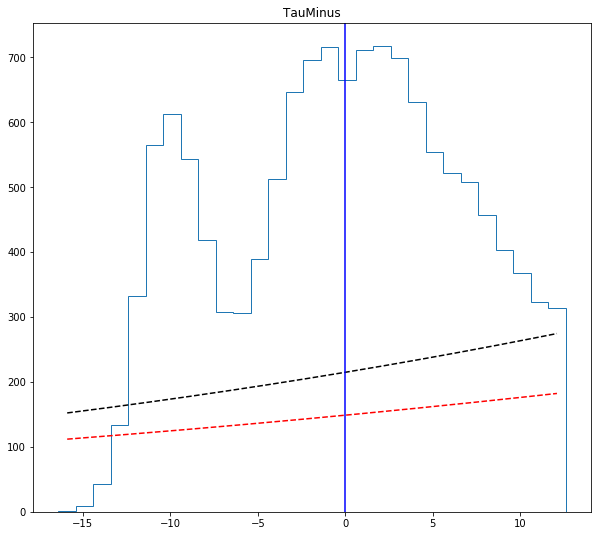

In [35]:
tau_timeDiff = ([])
tau_pVal = ([])
tau_LRR = ([])
tau_wid1_ratio = ([])
tau_wid2_ratio = ([])
tau_amp1_ratio = ([])
tau_amp2_ratio = ([])

e_timeDiff = ([])
e_pVal = ([])
e_LRR = ([])
e_wid1_ratio = ([])
e_wid2_ratio = ([])
e_amp1_ratio = ([])
e_amp2_ratio = ([])

tau_wid_ratio_dp = ([])
e_wid_ratio_dp = ([])
tau_amp_ratio_dp = ([])
e_amp_ratio_dp = ([])

break_all = False 
 
for i in range(96, 97):
    print('FILE NUMBER - ', i)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')
    #file = dataio.I3File(str(args.infile))

    f = 1
    for frame in file:
        print('frame num - ', f)
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        '''
        Removing NC interations of the neutrino
        '''

        #if lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
            #continue

        '''
        Lepton position
        '''
        #lepton_pos = lepton.pos
        #x_lepton_pos = lepton_pos.x
        #y_lepton_pos = lepton_pos.y
        #z_lepton_pos = lepton_pos.z

        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']

        #print('Finding OM Positions and time residuals')


        #looping through doms that have physics hits
        for omkey in mcpeMap.keys():
            oKey = omgeo.get(omkey)

            '''
            Dom Positons
            '''
            #domPos = oKey.position
            #x_dom = domPos.x
            #y_dom = domPos.y
            #z_dom = domPos.z

            '''
            Distance between event vertex and DOM
            '''
            #distance = np.sqrt((x_dom - x_lepton_pos)**2 + (y_dom - y_lepton_pos)**2 +
                               #(z_dom - z_lepton_pos)**2)

            #removing doms with distances > 100m from the event vertex
            #if distance > 200:
                #continue

            '''
            Obtaining the timeList
            '''
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            mcpeList = mcpeMap[omkey]
            timeList = np.array([mcpe.time for mcpe in mcpeList])
            tot_timeList = np.append(timeList, noise_timeList)


            '''
            Removing DOMs with hits less than 100
            '''
            if len(tot_timeList) < 250:
                continue


            '''
            Calculating the mean and removing the tails
            '''

            timeList = timeList[timeList < min(timeList)+30]

            mean_physicsHits = timeList.mean()
            mean_tot = tot_timeList.mean()

            select_time = tot_timeList[(tot_timeList > mean_physicsHits-50) & (tot_timeList < mean_physicsHits+50)]
            new_mean = select_time.mean()

            bins = np.arange(min(select_time), max(select_time), 1)
            max_hitTimes = select_time[(select_time > (new_mean-40))&(select_time < (new_mean+40))]

            z = stats.zscore(max_hitTimes)
            #using zscore to remove the effect of outliers from the analysis]
            max_hitTimes = max_hitTimes[(z < 1.2)]
            new_mean = max_hitTimes.mean()
            timestamps = max_hitTimes - new_mean
            final_mean = timestamps.mean()

            num_photons = len(max_hitTimes[max_hitTimes>0])

            if len(max_hitTimes) < 10:
                continue

            #if len(max_hitTimes) < 10:
                #continue

            #if np.log10(num_photons) >= 3.0 or np.log10(num_photons) < 2.5:
                #continue

            '''
            Histogramming the data from simulation
            '''

            bins = np.arange(min(timestamps), max(timestamps), 1)
            num, bin_edges = np.histogram(timestamps, bins=bins)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

            '''
            Removing hits for DOMs that have more than 200 hits in 1 second bin.
            '''
            if max(num) > 175 or len(num) == 0:

                print('LOG LIKELIHOOD')

                '''
                Removing DOMs that don't have less than 8 non zero bins
                '''
                if len(num[num>0]) <= 8:
                    print('Removing DOMs that dont have less than 8 non zero bins')
                


                '''
                Fitting bifurcated Gaussian and double bifurcated gaussian to the mcpe hit time distributions
                for both tau and electron.
                '''

                nll = lambda *args: log_likelihood_biGauss(*args)
                initial_biGauss = np.array([final_mean, 50, 5, max(num)])
                #bnds_biGauss = ((min(bin_centers), mean_timeArrival), (0, 20), (0, 2), (0, max(num)), (mean_timeArrival, max(bin_centers)), (0, 20), (0, 2), (0, max(num)))

                #print(len(num), len(initial_biGauss), initial_biGauss)
                bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 110), (0, 1010), (0, 1e6))
                print('----------BOUNDS-----------')
                print(bnds_biGauss)
                soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss, args=(num, bin_centers),
                                    method='Powell', bounds = bnds_biGauss)

                nll = lambda *args: log_likelihood_doublePeak(*args)
                initial_doublePeak = np.array([min(bin_centers), 20, 1, max(num), final_mean, 20, 1, max(num)])
                bnds_doublePeak = ((min(bin_centers), final_mean), (0, 1e3), (0, 100), (0, 1e6),
                               (final_mean, max(bin_centers)), (0, 1e3), (0, 100), (0,1e6))
                soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak, args=(num, bin_centers),
                                       method='Powell',bounds=bnds_doublePeak)

                '''
                Removing DOMs whose minimization is not successful
                '''
                #if soln_biGauss.success == False or soln_doublePeak.success == False:
                #print('Removing DOMs whose minimization is not successful')
                #continue

                '''
                Calculating the Likelihood ratio for bifurcated gaussian and double double bifurcated gaussian
                '''
                LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])


                '''
                Calculating the p-value using the likelihood ratio
                '''
                pVal_biGauss = chi2.sf(LR_biGauss, len(num) - 4)
                pVal_doublePeak = chi2.sf(LR_doublePeak, len(num) - 8)

                if pVal_biGauss != pVal_biGauss:
                    print('BiGauss gives not well defined - ', str(lepton.type))
                    print('Minimisation - ', soln_biGauss.success)
                    print('Degrees of Freedom - ', len(num) - 4)
                    print('Log Likelihood - ', LR_biGauss)
                if pVal_doublePeak != pVal_doublePeak:
                    print('double peak gives not well defined - ', str(lepton.type))
                    print('Minimisation - ', soln_doublePeak.success)
                    print('Degrees of Freedom - ', len(num) - 8)
                    print('Log Likelihood - ', LR_doublePeak)


                '''
                (x, y) values for the fit
                '''
                x = np.linspace(min(bin_centers), max(bin_centers), 1000)
                #x = np.linspace(0, max(bin_centers)+1e5, 1000)
                y_biGauss = biGauss(x, soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])

                '''
                Calculating the time difference and p-value ratio of bigauss and double peak
                '''
                timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]
                pVal_ratio = pVal_doublePeak/pVal_biGauss
                LRR = LR_doublePeak/LR_biGauss
                wid1_ratio = soln_doublePeak.x[1]/soln_biGauss.x[1]
                wid2_ratio = soln_doublePeak.x[5]/soln_biGauss.x[1]
                amp1_ratio = soln_doublePeak.x[3]/soln_biGauss.x[3]
                amp2_ratio = soln_doublePeak.x[7]/soln_biGauss.x[3]
                wid1_wid2 = soln_doublePeak.x[1]/soln_doublePeak.x[5]
                amp1_amp2 = soln_doublePeak.x[3]/soln_doublePeak.x[7]



                '''
                Removing terrible fits
                '''
                if abs(timeDifference_doublePeak) > 100:
                    continue

                amp1 = soln_doublePeak.x[3]
                amp2 = soln_doublePeak.x[7]
                if amp1/amp2 < 1/4 and amp1/amp2 > 4:
                    print('Removing terrible fits')
                    continue

                if amp1 < 0 or amp2 < 0:
                    print('Error in amp')
                    continue
                
                print('Reached Here')


                '''
                plot mcpe time distributions obtained using simulations and the fits
                '''
                plt.figure(figsize=(10,9))
                _ = plt.hist(timestamps, bins=bins, histtype='step')
                plt.title(str(lepton.type))
                plt.plot(x, y_biGauss, '--', c = 'r')
                plt.plot(x, y_doublePeak, '--', c = 'k')
                plt.axvline(final_mean, c = 'b')



                '''
                Separating the time difference calculated above and appending the values
                '''

                '''
                Tau
                '''
                if lepton.type == 15 or lepton.type == -15:
                    tau_timeDiff = np.append(tau_timeDiff, timeDifference_doublePeak)
                    tau_pVal = np.append(tau_pVal, pVal_ratio)
                    tau_LRR = np.append(tau_LRR, LRR)
                    tau_wid1_ratio = np.append(tau_wid1_ratio, wid1_ratio)
                    tau_wid2_ratio = np.append(tau_wid2_ratio, wid2_ratio)
                    tau_amp1_ratio = np.append(tau_amp1_ratio, amp1_ratio)
                    tau_amp2_ratio = np.append(tau_amp2_ratio, amp2_ratio)

                    tau_wid_ratio_dp = np.append(tau_wid_ratio_dp, wid1_wid2)
                    tau_amp_ratio_dp = np.append(tau_amp_ratio_dp, amp1_amp2)
                    #plt.title('E')

                '''
                Electron and Neutral Current
                '''

                if lepton.type == 11 or lepton.type == -11 or lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
                    
                    e_timeDiff = np.append(e_timeDiff, timeDifference_doublePeak)
                    e_pVal = np.append(e_pVal, pVal_ratio)
                    e_LRR = np.append(e_LRR, LRR)
                    e_wid1_ratio = np.append(e_wid1_ratio, wid1_ratio)
                    e_wid2_ratio = np.append(e_wid2_ratio, wid2_ratio)
                    e_amp1_ratio = np.append(e_amp1_ratio, amp1_ratio)
                    e_amp2_ratio = np.append(e_amp2_ratio, amp2_ratio)

                    e_wid_ratio_dp = np.append(e_wid_ratio_dp, wid1_wid2)
                    e_amp_ratio_dp = np.append(e_amp_ratio_dp, amp1_amp2)
                print('P-VAL CALCULATED')
                
                    
                break_all = True
                
                break
                
        if break_all:
            break
    if break_all:
        break



                    #plt.title('Tau')


                


        '''
        print(tot_timeList)

        bins = np.arange(min(tot_timeList), min(tot_timeList)+41, 1)
        num, bin_edges, _ = plt.hist(tot_timeList, bins=bins, histtype='step')
        plt.title('Tau')
        '''
        f = f+1

In [ ]:
def printMinimizer():